# Step 3: Prepare Data for Consumption

## 3.1 Import Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python

#load packages
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

#misc libraries
import random
import time


#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)

Python version: 3.5.2 |Anaconda custom (64-bit)| (default, Jul  5 2016, 11:41:13) [MSC v.1900 64 bit (AMD64)]
pandas version: 0.20.2
matplotlib version: 2.0.2
NumPy version: 1.12.1
SciPy version: 1.0.0
IPython version: 6.1.0
scikit-learn version: 0.19.1
-------------------------


In [2]:
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

#from subprocess import check_output
#print(check_output(["dir"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

## 3.11 Load Data Modelling Libraries

In [3]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
# from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.tools.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

In [4]:
# !!!!!!!
# import py-xgboost as xgb
# !!!!!!!

In [5]:
data_raw = pd.read_csv('../input/train.csv')
data_val  = pd.read_csv('../input/test.csv')

#to play with our data we'll create a copy
data1 = data_raw.copy(deep = True)

#however passing by reference is convenient, because we can clean both datasets at once
data_cleaner = [data1, data_val]


#preview data
print (data_raw.info()) 
data_raw.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
405,406,0,2,"Gale, Mr. Shadrach",male,34.00,1,0,28664,21.0000,NaN,S
410,411,0,3,"Sdycoff, Mr. Todor",male,NaN,0,0,349222,7.8958,NaN,S
354,355,0,3,"Yousif, Mr. Wazli",male,NaN,0,0,2647,7.2250,NaN,C
634,635,0,3,"Skoog, Miss. Mabel",female,9.00,3,2,347088,27.9000,NaN,S
552,553,0,3,"O'Brien, Mr. Timothy",male,NaN,0,0,330979,7.8292,NaN,Q
403,404,0,3,"Hakkarainen, Mr. Pekka Pietari",male,28.00,1,0,STON/O2. 3101279,15.8500,NaN,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.00,0,1,11767,83.1583,C50,C
60,61,0,3,"Sirayanian, Mr. Orsen",male,22.00,0,0,2669,7.2292,NaN,C
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.00,0,0,248706,16.0000,NaN,S


## 3.22 Cleaning the data

In [6]:
###COMPLETING: complete or delete missing values in train and test/validation dataset
for dataset in data_cleaner:    
    #complete missing age with median
    dataset['Age'].fillna(dataset['Age'].median(), inplace = True)

    #complete embarked with mode
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)

    #complete missing fare with median
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True)

In [7]:
# data_raw.describe(include = 'all')
data_raw.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
#delete the cabin feature/column and others previously stated to exclude in train dataset
drop_column = ['PassengerId','Cabin', 'Ticket']
data1.drop(drop_column, axis=1, inplace = True)

In [9]:
for dataset in data_cleaner:    
    #Discrete variables
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

    dataset['IsAlone'] = 1 #initialize to yes/1 is alone
    dataset.loc[dataset['FamilySize'] > 1, 'IsAlone'] = 0 # now update to no/0 if family size is greater
    
    dataset['Title'] = dataset['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
    
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)
    
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)

In [10]:
stat_min = 10
title_names = (data1['Title'].value_counts() < stat_min)

In [11]:
data1['Title'] = data1['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
print(data1['Title'].value_counts())
print("-"*10)

Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64
----------


In [12]:
# dataset['FamilySize'].head()

## 3.23 Convert Formats

In [13]:
#CONVERT: convert objects to category using Label Encoder for train and test/validation dataset

#code categorical data
label = LabelEncoder()
for dataset in data_cleaner:    
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset['Title_Code'] = label.fit_transform(dataset['Title'])
    dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])
    dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])


#define y variable aka target/outcome
Target = ['Survived']

#define x variables for original features aka feature selection
data1_x = ['Sex','Pclass', 'Embarked', 'Title','SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] #pretty name/values for charts
data1_x_calc = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code','SibSp', 'Parch', 'Age', 'Fare'] #coded for algorithm calculation
data1_xy =  Target + data1_x
print('Original X Y: ', data1_xy, '\n')


#define x variables for original w/bin features to remove continuous variables
data1_x_bin = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code']
data1_xy_bin = Target + data1_x_bin
print('Bin X Y: ', data1_xy_bin, '\n')


#define x and y variables for dummy features original
data1_dummy = pd.get_dummies(data1[data1_x])
data1_x_dummy = data1_dummy.columns.tolist()
data1_xy_dummy = Target + data1_x_dummy
print('Dummy X Y: ', data1_xy_dummy, '\n')

data1_dummy.head()

Original X Y:  ['Survived', 'Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] 

Bin X Y:  ['Survived', 'Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code'] 

Dummy X Y:  ['Survived', 'Pclass', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Misc', 'Title_Miss', 'Title_Mr', 'Title_Mrs'] 



,Pclass,SibSp,Parch,Age,Fare,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs
0,3,1,0,22.0,7.2500,2,0,0,1,0,0,1,0,0,0,1,0
1,1,1,0,38.0,71.2833,2,0,1,0,1,0,0,0,0,0,0,1
2,3,0,0,26.0,7.9250,1,1,1,0,0,0,1,0,0,1,0,0
3,1,1,0,35.0,53.1000,2,0,1,0,0,0,1,0,0,0,0,1
4,3,0,0,35.0,8.0500,1,1,0,1,0,0,1,0,0,0,1,0


In [14]:
# data1.head()

## 3.24 Da-Double Check Cleaned Data

In [15]:
print('Train columns with null values: \n', data1.isnull().sum())
print("-"*10)
print (data1.info())
print("-"*10)

print('Test/Validation columns with null values: \n', data_val.isnull().sum())
print("-"*10)
print (data_val.info())
print("-"*10)

data_raw.describe(include = 'all')

Train columns with null values: 
 Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
FamilySize       0
IsAlone          0
Title            0
FareBin          0
AgeBin           0
Sex_Code         0
Embarked_Code    0
Title_Code       0
AgeBin_Code      0
FareBin_Code     0
dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
Survived         891 non-null int64
Pclass           891 non-null int64
Name             891 non-null object
Sex              891 non-null object
Age              891 non-null float64
SibSp            891 non-null int64
Parch            891 non-null int64
Fare             891 non-null float64
Embarked         891 non-null object
FamilySize       891 non-null int64
IsAlone          891 non-null int64
Title            891 non-null object
FareBin          891 non-null catego

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Leitch, Miss. Jessie Wills",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## 3.25 Split Training and Testing Data

In [16]:
#split train and test data with function defaults
#random_state -> seed or control random number generator: https://www.quora.com/What-is-seed-in-random-number-generation
train1_x, test1_x, train1_y, test1_y = model_selection.train_test_split(data1[data1_x_calc], data1[Target], random_state = 0)
train1_x_bin, test1_x_bin, train1_y_bin, test1_y_bin = model_selection.train_test_split(data1[data1_x_bin], data1[Target] , random_state = 0)
train1_x_dummy, test1_x_dummy, train1_y_dummy, test1_y_dummy = model_selection.train_test_split(data1_dummy[data1_x_dummy], data1[Target], random_state = 0)


print("Data1 Shape: {}".format(data1.shape))
print("Train1 Shape: {}".format(train1_x.shape))
print("Test1 Shape: {}".format(test1_x.shape))

train1_x_bin.head()

Data1 Shape: (891, 19)
Train1 Shape: (668, 8)
Test1 Shape: (223, 8)


,Sex_Code,Pclass,Embarked_Code,Title_Code,FamilySize,AgeBin_Code,FareBin_Code
105,1,3,2,3,1,1,0
68,0,3,2,2,7,1,1
253,1,3,2,3,2,1,2
320,1,3,2,3,1,1,0
706,0,2,2,4,1,2,1


# Step 4: Perform Exploratory Analysis with Statistics

In [17]:
#Discrete Variable Correlation by Survival using
#group by aka pivot table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html
for x in data1_x:
    if data1[x].dtype != 'float64' :
        print('Survival Correlation by:', x)
        print(data1[[x, Target[0]]].groupby(x, as_index=False).mean())
        print('-'*10, '\n')
        

#using crosstabs: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html
print(pd.crosstab(data1['Title'],data1[Target[0]]))

Survival Correlation by: Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908
---------- 

Survival Correlation by: Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
---------- 

Survival Correlation by: Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009
---------- 

Survival Correlation by: Title
    Title  Survived
0  Master  0.575000
1    Misc  0.444444
2    Miss  0.697802
3      Mr  0.156673
4     Mrs  0.792000
---------- 

Survival Correlation by: SibSp
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
---------- 

Survival Correlation by: Parch
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000
---------- 

Survival Correlation by: FamilySize
   FamilySize  Survived
0           1  0.303538
1 

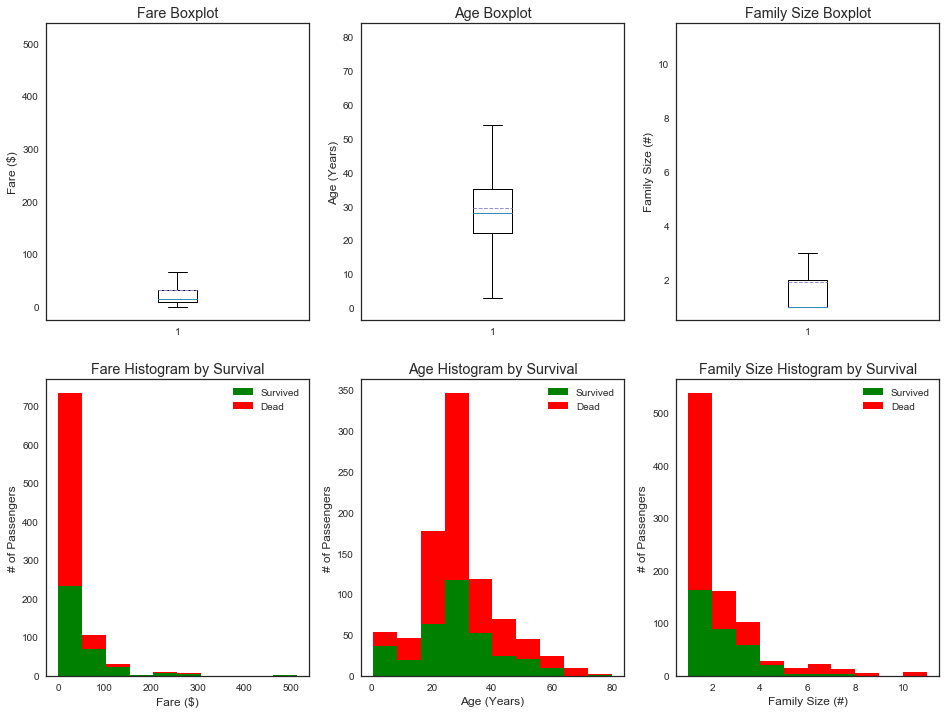

In [18]:
#graph distribution of quantitative data
plt.figure(figsize=[16,12])

plt.subplot(231)
plt.boxplot(x=data1['Fare'], showmeans = True, meanline = True)
plt.title('Fare Boxplot')
plt.ylabel('Fare ($)')

plt.subplot(232)
plt.boxplot(data1['Age'], showmeans = True, meanline = True)
plt.title('Age Boxplot')
plt.ylabel('Age (Years)')

plt.subplot(233)
plt.boxplot(data1['FamilySize'], showmeans = True, meanline = True)
plt.title('Family Size Boxplot')
plt.ylabel('Family Size (#)')

plt.subplot(234)
plt.hist(x = [data1[data1['Survived']==1]['Fare'], data1[data1['Survived']==0]['Fare']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Fare Histogram by Survival')
plt.xlabel('Fare ($)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(235)
plt.hist(x = [data1[data1['Survived']==1]['Age'], data1[data1['Survived']==0]['Age']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Age Histogram by Survival')
plt.xlabel('Age (Years)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(236)
plt.hist(x = [data1[data1['Survived']==1]['FamilySize'], data1[data1['Survived']==0]['FamilySize']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Family Size Histogram by Survival')
plt.xlabel('Family Size (#)')
plt.ylabel('# of Passengers')
plt.legend()

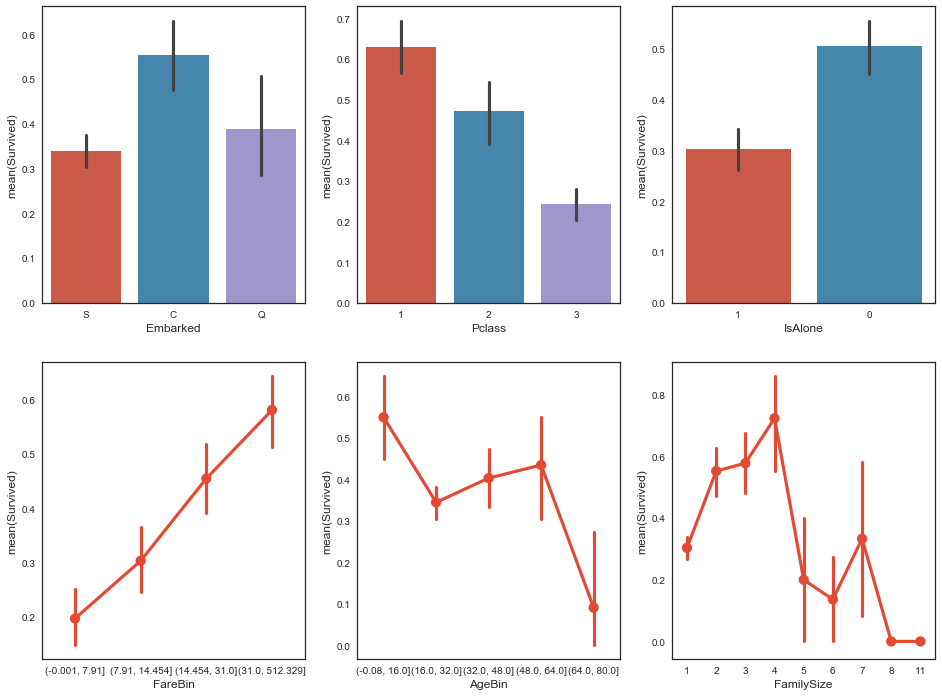

In [19]:
#we will use seaborn graphics for multi-variable comparison: https://seaborn.pydata.org/api.html

#graph individual features by survival
fig, saxis = plt.subplots(2, 3,figsize=(16,12))

sns.barplot(x = 'Embarked', y = 'Survived', data=data1, ax = saxis[0,0])
sns.barplot(x = 'Pclass', y = 'Survived', order=[1,2,3], data=data1, ax = saxis[0,1])
sns.barplot(x = 'IsAlone', y = 'Survived', order=[1,0], data=data1, ax = saxis[0,2])

sns.pointplot(x = 'FareBin', y = 'Survived',  data=data1, ax = saxis[1,0])
sns.pointplot(x = 'AgeBin', y = 'Survived',  data=data1, ax = saxis[1,1])
sns.pointplot(x = 'FamilySize', y = 'Survived', data=data1, ax = saxis[1,2])

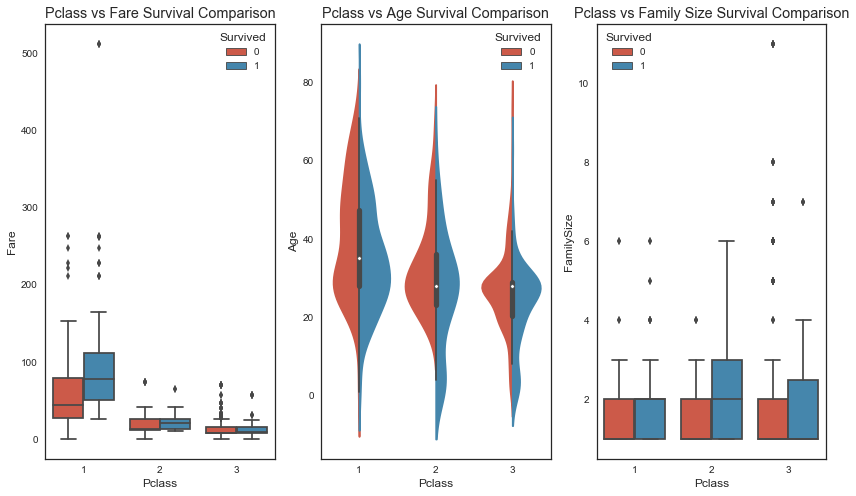

In [20]:
#graph distribution of qualitative data: Pclass
#we know class mattered in survival, now let's compare class and a 2nd feature
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(14,8))

sns.boxplot(x = 'Pclass', y = 'Fare', hue = 'Survived', data = data1, ax = axis1)
axis1.set_title('Pclass vs Fare Survival Comparison')

sns.violinplot(x = 'Pclass', y = 'Age', hue = 'Survived', data = data1, split = True, ax = axis2)
axis2.set_title('Pclass vs Age Survival Comparison')

sns.boxplot(x = 'Pclass', y ='FamilySize', hue = 'Survived', data = data1, ax = axis3)
axis3.set_title('Pclass vs Family Size Survival Comparison')

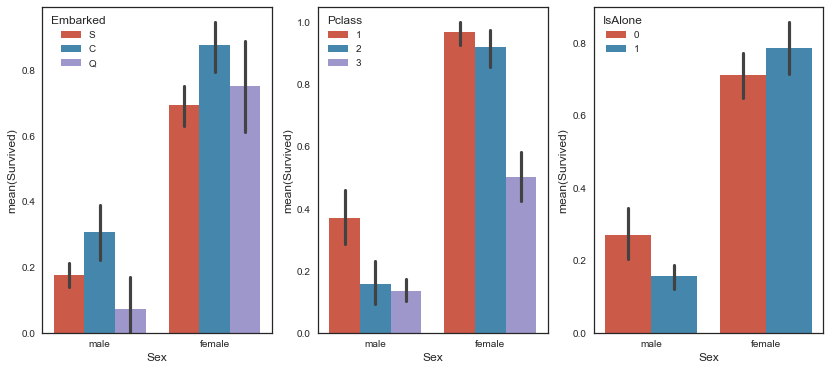

In [21]:
#graph distribution of qualitative data: Sex
#we know sex mattered in survival, now let's compare sex and a 2nd feature
fig, qaxis = plt.subplots(1,3,figsize=(14,6))

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Embarked', data=data1, ax = qaxis[0])
axis1.set_title('Sex vs Embarked Survival Comparison')

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Pclass', data=data1, ax  = qaxis[1])
axis1.set_title('Sex vs Pclass Survival Comparison')

sns.barplot(x = 'Sex', y = 'Survived', hue = 'IsAlone', data=data1, ax  = qaxis[2])
axis1.set_title('Sex vs IsAlone Survival Comparison')

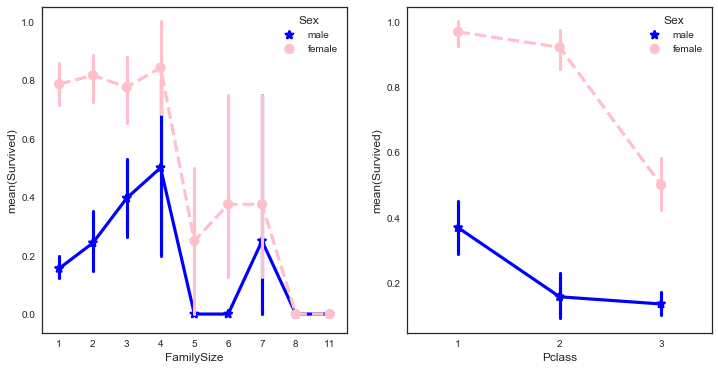

In [22]:
#more side-by-side comparisons
fig, (maxis1, maxis2) = plt.subplots(1, 2,figsize=(12,6))

#how does family size factor with sex & survival compare
sns.pointplot(x="FamilySize", y="Survived", hue="Sex", data=data1,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"], ax = maxis1)

#how does class factor with sex & survival compare
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=data1,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"], ax = maxis2)

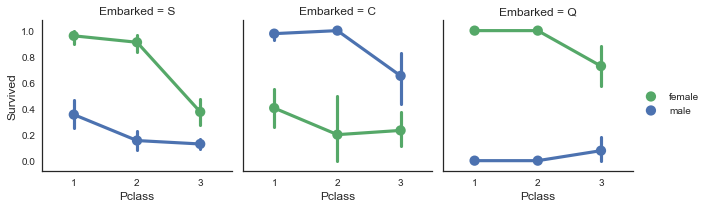

In [23]:
#how does embark port factor with class, sex, and survival compare
#facetgrid: https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
e = sns.FacetGrid(data1, col = 'Embarked')
e.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', ci=95.0, palette = 'deep')
e.add_legend()

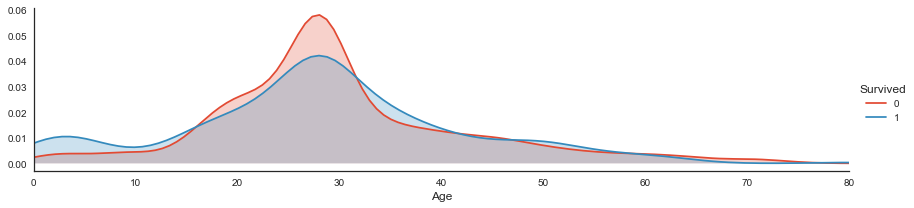

In [24]:
#plot distributions of age of passengers who survived or did not survive
a = sns.FacetGrid( data1, hue = 'Survived', aspect=4 )
a.map(sns.kdeplot, 'Age', shade= True )
a.set(xlim=(0 , data1['Age'].max()))
a.add_legend()

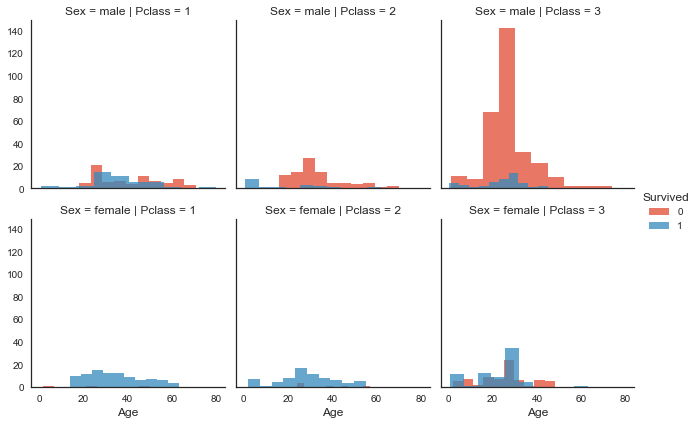

In [25]:
#histogram comparison of sex, class, and age by survival
h = sns.FacetGrid(data1, row = 'Sex', col = 'Pclass', hue = 'Survived')
h.map(plt.hist, 'Age', alpha = .75)
h.add_legend()

In [26]:
#pair plots of entire dataset
# pp = sns.pairplot(data1, hue = 'Survived', palette = 'deep', size=1.2, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=10) )
# pp.set(xticklabels=[])

In [27]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

# correlation_heatmap(data1)

# Step 5: Model Data

In [28]:
#Machine Learning Algorithm (MLA) Selection and Initialization
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    # XGBClassifier()    
    ]

In [29]:
#split dataset in cross-validation with this splitter class: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit
#note: this is an alternative to train_test_split
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = data1[Target]

#index through MLA and save performance to table
row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    # cv_results = model_selection.cross_validate(alg, data1[data1_x_bin], data1[Target], cv  = cv_split)
    cv_results = model_selection.cross_val_score(alg, data1[data1_x_bin], data1[Target], cv  = cv_split)

#     print(MLA_name)
#     print(cv_results.mean())
#     print('-'*10)


#     MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
#     MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
#     MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
#     #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
#     MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    

#     #save MLA predictions - see section 6 for usage
#     alg.fit(data1[data1_x_bin], data1[Target])
#     MLA_predict[MLA_name] = alg.predict(data1[data1_x_bin])
    
#     row_index+=1

    
# #print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
# MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
# MLA_compare
# #MLA_predict

In [30]:
cv_results.mean()

0.80708955223880596

In [31]:
MLA_name

'QuadraticDiscriminantAnalysis'

## 5.1 Explore methods and outputs of estimators' functions

In [32]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds, title=None):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    if title != None:
        plt.title = title
    plt.ylim([0, 1])
    
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

### DataFrame of prediction scores

In [1]:
y_scores = pd.DataFrame(columns=["value","classifier"])
y_scores

NameError: name 'pd' is not defined

In [34]:
from sklearn.utils.testing import all_estimators

estimators = all_estimators()

for name, class_ in estimators:
    if hasattr(class_, 'decision_function') and (name not in ["BaggingClassifier", "IsolationForest", "OneClassSVM", "_ConstantPredictor"]):
        print(name)
        
        clf = class_() 
        clf.fit(data1[data1_x_bin], data1[Target])
        y_score = sklearn.model_selection.cross_val_predict(clf, data1[data1_x_bin],data1[Target], cv = 10, method="decision_function")
        
        new_data = pd.DataFrame({"value" : y_score})
        new_data.insert(0, "classifier", name)
        
        y_scores = y_scores.append(new_data)

AdaBoostClassifier
GradientBoostingClassifier
LinearDiscriminantAnalysis
LinearSVC
LogisticRegression
LogisticRegressionCV
NuSVC
PassiveAggressiveClassifier
Perceptron
QuadraticDiscriminantAnalysis
RidgeClassifier
RidgeClassifierCV
SGDClassifier
SVC


In [42]:
type(res_1)
len(res_1)
res_1

a       ([11, 12, 13], [3, 6, 9])
b    ([14, 15, 16], [12, 15, 18])
c    ([20, 21, 22], [30, 33, 36])
dtype: object

In [46]:
# reshape into a wide format
y_scores_wide = y_scores.assign(index=y_scores.groupby("classifier").value.cumcount()).pivot('index','classifier','value')

In [139]:
# precisions, recalls, thresholds = sklearn.metrics.precision_recall_curve(data1[Target], y_scores_prob)
# precisions, recalls, thresholds = [sklearn.metrics.precision_recall_curve(data1[Target], y_scores_wide[x]) for x in y_scores_wide]
# [y_scores_wide[x].shape for x in y_scores_wide]



def precision_recall_wrapper(probas_pred, y_true):
    return(sklearn.metrics.precision_recall_curve(y_true, probas_pred))

res = y_scores_wide.apply(precision_recall_wrapper, axis=0, y_true=data1[Target])
 
print(type(res))
# print(res)
type(res[1][1])
len(res[1])
res

<class 'pandas.core.series.Series'>


classifier
AdaBoostClassifier               ([0.386877828054, 0.386183465459, 0.3866213151...
GradientBoostingClassifier       ([0.384269662921, 0.384009009009, 0.3844419391...
LinearDiscriminantAnalysis       ([0.396292004635, 0.395591647332, 0.3960511033...
LinearSVC                        ([0.394919168591, 0.394219653179, 0.3946759259...
LogisticRegression               ([0.39175257732, 0.391055045872, 0.39150401837...
LogisticRegressionCV             ([0.395375722543, 0.394675925926, 0.3951332560...
NuSVC                            ([0.387755102041, 0.38706015891, 0.3875, 0.388...
PassiveAggressiveClassifier      ([0.392201834862, 0.391954022989, 0.3924050632...
Perceptron                       ([0.386440677966, 0.385746606335, 0.3866213151...
QuadraticDiscriminantAnalysis    ([0.387755102041, 0.38706015891, 0.3875, 0.387...
RidgeClassifier                  ([0.403778040142, 0.403073286052, 0.4040284360...
RidgeClassifierCV                ([0.403778040142, 0.403073286052, 0.4040284

In [137]:
def convert_precisions_recalls_thresholds(series_result, position):
    
    res = pd.DataFrame()
    
    for index, classifier in enumerate(series_result):
        
        res[series_result.index[index]] = classifier[position]
#     return(res)
        
    
    
# convert_precisions_recalls_thresholds(series_result = res, position = 0)

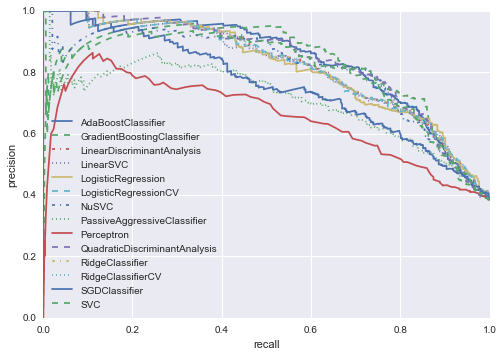

In [169]:
linestyles = ['-','--','-.',':']

res2 = pd.DataFrame()
for ind, classifier in enumerate(res):

    
    plt.plot(classifier[1], classifier[0], label = res.index[ind], linestyle = linestyles[ind%4])
    
    plt.legend(loc='lower left')
    
    plt.xlabel("recall")
    plt.ylabel("precision")
    
#     print((res.index[ind]))
#     print(type((res.index[ind])))
#     print(type(classifier[1]))
#     print(len(classifier[0]))
#     print(len(classifier[1]))
#     print(len(classifier[2]))
#     print(classifier[1])
#     print(res.index[ind][1])
#     res2[res.index[ind]] = classifier[0]

In [133]:
df = pd.DataFrame()
df

""


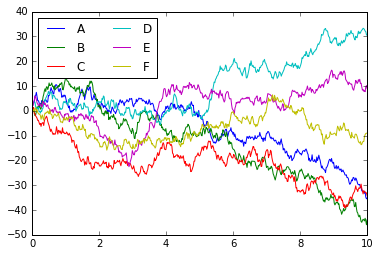

In [103]:
# res.index[0]

# for nm, val in enumerate(res):
#     print(nm)
#     print(val[0][0])
#     print(res.index[nm])

import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

# Plot the data with Matplotlib defaults
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

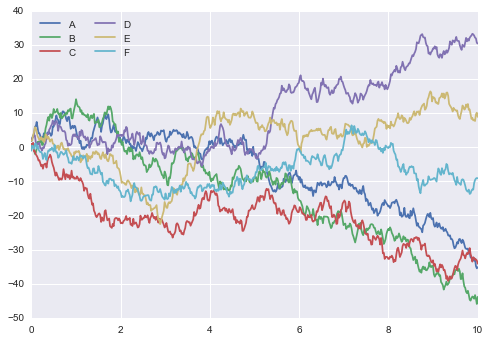

In [104]:
import seaborn as sns
sns.set()

plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

In [107]:
x.shape

(500,)

In [108]:
y.shape

(500, 6)

In [64]:
df = pd.DataFrame({"a" : [1,2,3], "b" :[4,5,6], "c":[10,11,12]})

def my_fun_2(values, const):
    return(values+np.mean(values), values+const)

def my_fun_2_wrap(const,df):
    
    return(df.apply(my_fun_2, axis=0, const=const))


my_fun_2_wrap(const=0.5,df=df)

# def my_fun(values):
#     return(values+10, values*3)

# res_1 = df.apply(my_fun, axis=0, broadcast = False, raw = True)

# res_1

a          ([3.0, 4.0, 5.0], [1.5, 2.5, 3.5])
b        ([9.0, 10.0, 11.0], [4.5, 5.5, 6.5])
c    ([21.0, 22.0, 23.0], [10.5, 11.5, 12.5])
dtype: object

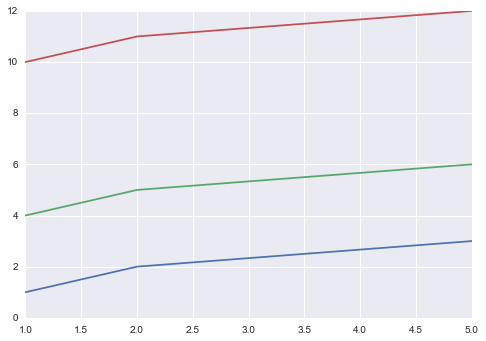

In [132]:
plt.plot([1,2,5], df)

## ensemble.AdaBoostClassifier()

In [ ]:
# iterate over each classifier and estimate it
# for clf in MLA:
#     clf.fit(data1[data1_x_bin], data1[Target])
    
fitted_clf = [clf.fit(data1[data1_x_bin], data1[Target]) for clf in MLA]

In [ ]:
# MLA_fitted

In [ ]:
# generate df of precision_scores
precision_scores = [sklearn.metrics.precision_score(data1[Target], clf.predict(data1[data1_x_bin])) for clf in fitted_clf]
# precision_scores

In [ ]:
# get probabilities
# y_scores = [sklearn.model_selection.cross_val_predict(clf, data1[data1_x_bin],
#                                                           data1[Target], cv = 10, method="decision_function") 
#             for clf in fitted_clf]

for clf in fitted_clf:
    try:
        y_score = sklearn.model_selection.cross_val_predict(clf, data1[data1_x_bin],data1[Target], cv = 10, method="decision_function")
        print("HAS DESICISON FUNC")
        print(clf)
        print("-"*10)
    except AttributeError:
        print(clf)
        print("-"*10)

In [ ]:
from sklearn.utils.testing import all_estimators

estimators = all_estimators()

for name, class_ in estimators:
    if hasattr(class_, 'decision_function'):
        print(name)

In [ ]:
from sklearn.utils.testing import all_estimators

estimators = all_estimators()

for name, class_ in estimators:
    if hasattr(class_, 'predict_proba'):
        print(name)

In [ ]:
import random
import pandas as pd

alpha = list('abcdefghijklmnopqrstuvwxyz')

gen = ((random.choice(alpha), random.randint(0,100)) for x in range(10000))
my_data = [x for x in gen]
df = pd.DataFrame(my_data, columns=['letter','value'])

In [ ]:
type(my_data)

In [111]:
clf_adaboost = ensemble.AdaBoostClassifier()
clf_adaboost.fit(data1[data1_x_bin], data1[Target])

clf_adaboost_pred = clf_adaboost.predict(data1[data1_x_bin])

In [112]:
# [(eval(clf) for clf in MLA)]
xx = 5
xx

5

In [113]:
sklearn.metrics.precision_score(data1[Target], clf_adaboost_pred)

0.76627218934911245

In [114]:
sklearn.metrics.recall_score(data1[Target], clf_adaboost_pred)

0.75730994152046782

In [115]:
y_scores_prob = sklearn.model_selection.cross_val_predict(clf_adaboost, data1[data1_x_bin],
                                                          data1[Target], cv = 10, method="decision_function")
y_scores_tf = (y_scores_prob > 0)

y_scores = sklearn.model_selection.cross_val_predict(clf_adaboost, data1[data1_x_bin],
                                                          data1[Target], cv = 10)

In [116]:
y_scores_prob

array([ -5.59050414e-02,   7.45109144e-02,   1.19231641e-02,
         6.78704042e-02,  -5.24580494e-02,  -4.24213670e-02,
        -1.09393833e-02,  -1.19494401e-02,   1.36051453e-02,
         5.89182726e-02,   1.59296508e-02,   3.90070874e-02,
        -4.74787058e-02,  -1.10235832e-01,   1.67940360e-02,
         3.29403890e-02,  -1.84417620e-02,  -3.14476845e-02,
         2.78479066e-02,   2.84844338e-02,  -2.90526350e-02,
        -3.64270281e-02,   2.53793375e-02,   4.89752855e-03,
        -3.97328392e-02,  -3.73852403e-02,  -4.43661583e-02,
        -7.40813633e-02,   1.34525402e-02,  -5.10066685e-02,
        -3.79590657e-04,   7.94902580e-02,   1.34525402e-02,
        -6.41916275e-02,   6.63966579e-03,  -4.98018795e-03,
        -4.43661583e-02,  -4.74787058e-02,   7.53081618e-03,
         2.20641360e-02,   1.54941699e-02,   4.38789279e-02,
        -4.43661583e-02,   4.03947531e-02,   1.34525402e-02,
        -4.74787058e-02,  -3.99453468e-02,   1.34525402e-02,
        -4.52305436e-02,

In [117]:
clf_adaboost.predict_proba(data1[data1_x_bin])

array([[ 0.51510897,  0.48489103],
       [ 0.48200005,  0.51799995],
       [ 0.49609304,  0.50390696],
       ..., 
       [ 0.50024686,  0.49975314],
       [ 0.4998411 ,  0.5001589 ],
       [ 0.5108847 ,  0.4891153 ]])

In [118]:
y_scores_tf[1:10]

array([ True,  True,  True, False, False, False, False,  True,  True], dtype=bool)

In [119]:
y_scores[1:10]

array([1, 1, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [120]:
precisions, recalls, thresholds = sklearn.metrics.precision_recall_curve(data1[Target], y_scores_prob)

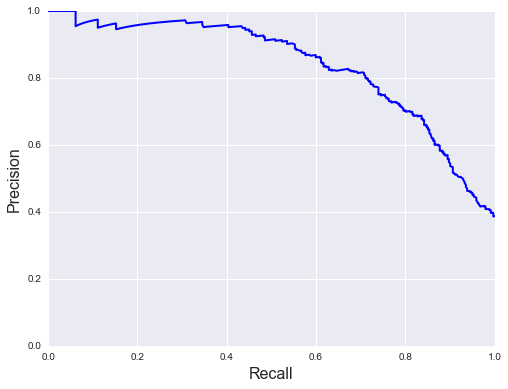

In [121]:
# create precision - recall plot here (p. 87)
plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)

In [128]:
precisions.shape
# recalls.shape

(592,)

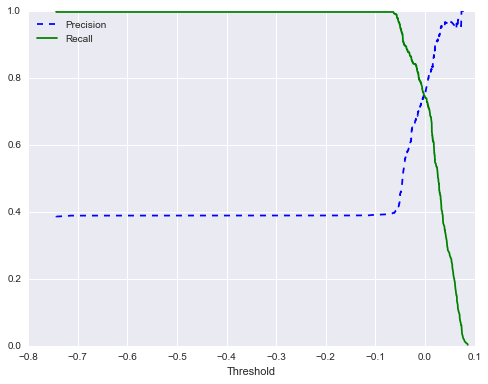

In [122]:
# create precision - recall plot with decision threshold here (p. 86)
plt.figure(figsize=(8, 6))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds, title="AdaBoostClassifier")
plt.show()

In [ ]:
fpr, tpr, thresholds = sklearn.metrics.roc_curve(data1[Target], y_scores_prob)

In [ ]:
# create ROC curve plot here
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)

## ensemble.BaggingClassifier()

In [ ]:
clf_bagging_classifier = ensemble.BaggingClassifier()
clf_bagging_classifier.fit(X = data1[data1_x_bin], y = data1[Target])

clf_bagging_classifier_pred = clf_bagging_classifier.predict(data1[data1_x_bin])

In [ ]:
clf_bagging_classifier

## ensemble.ExtraTreesClassifier()

In [ ]:
clf_gbc = ensemble.GradientBoostingClassifier()
clf_gbc.fit(X = data1[data1_x_bin], y = data1[Target])

In [ ]:
y_scores_prob = sklearn.model_selection.cross_val_predict(clf_gbc, data1[data1_x_bin],
                                                          data1[Target], cv = 10, method="decision_function")

## ensemble.GradientBoostingClassifier()

## ensemble.RandomForestClassifier()

## linear_model.LogisticRegressionCV()

In [ ]:
clf_lrcv = linear_model.LogisticRegressionCV()
clf_lrcv.fit(X = data1[data1_x_bin], y = data1[Target])

In [ ]:
y_scores_prob = sklearn.model_selection.cross_val_predict(clf_lrcv, data1[data1_x_bin],
                                                          data1[Target], cv = 10, method="decision_function")

In [ ]:
y_scores_prob